# Data Source: https://www.kaggle.com/datasets/neuromusic/avocado-prices

In [40]:
#!pip install prophet

# 📚 Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [3]:
avo=pd.read_csv(r"C:\Users\eyads\Downloads\avocado_dataset\avocado.csv")
avo.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# TSF Case Study: Prediction using Supervised ML


In [4]:
avo.shape

(18249, 14)

In [5]:
avo.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [39]:
avo=avo.sort_values("Date")
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
17625,0,2018-03-25,1.33,57606.42,2002.40,5548.18,82.68,49973.16,49957.61,15.55,0.00,organic,2018,BaltimoreWashington
18033,0,2018-03-25,1.66,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2018,Portland


# 📊 Exploratory Data Analysis (EDA)

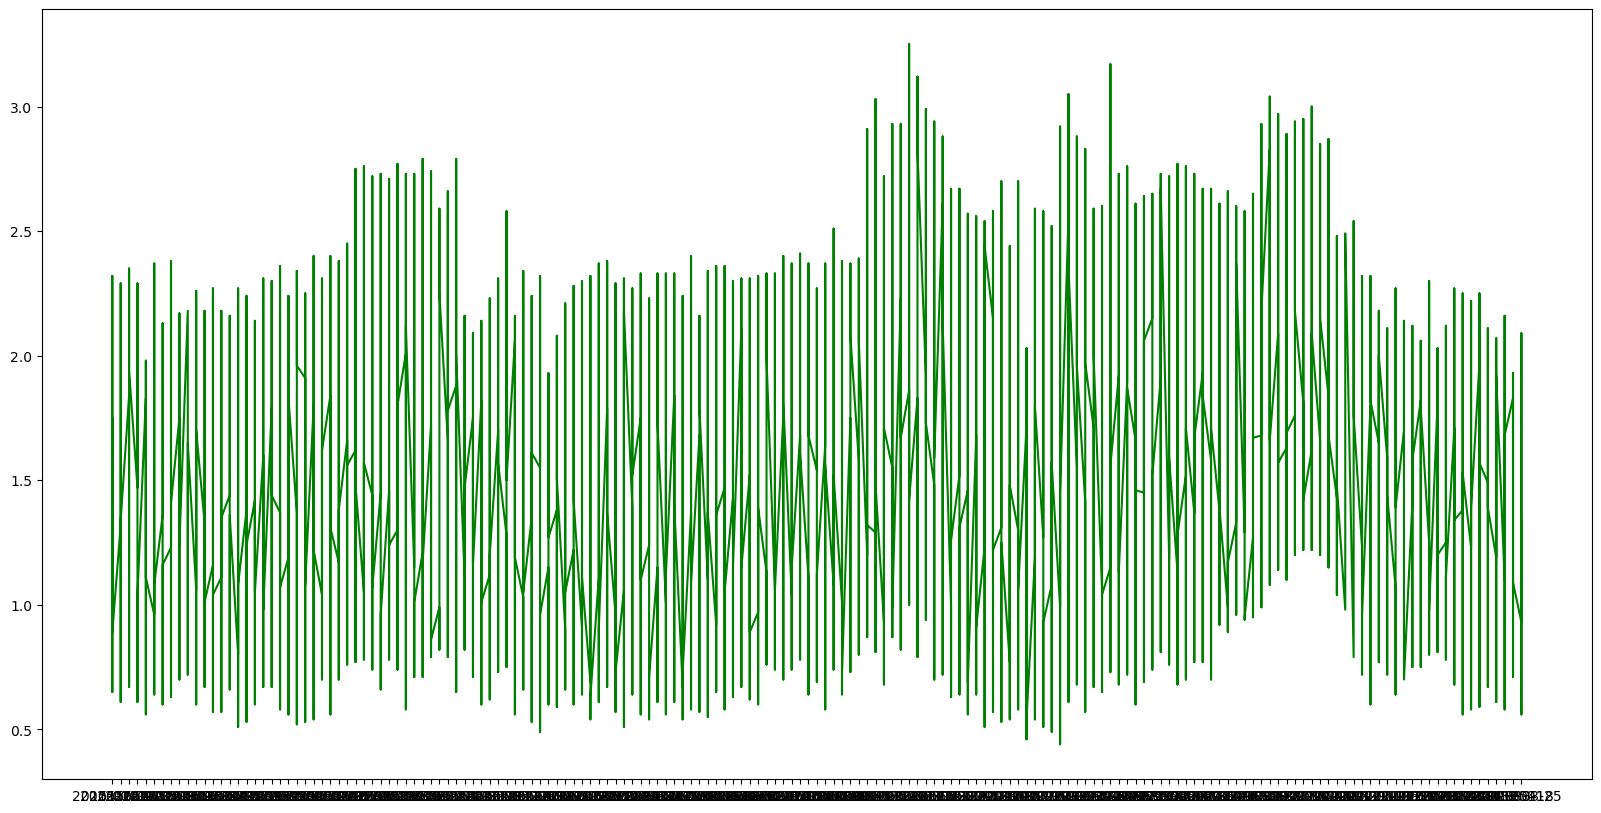

In [17]:
plt.figure(figsize=(20,10))
plt.plot(avo['Date'],avo['AveragePrice'],color='green')

<Axes: xlabel='year', ylabel='count'>

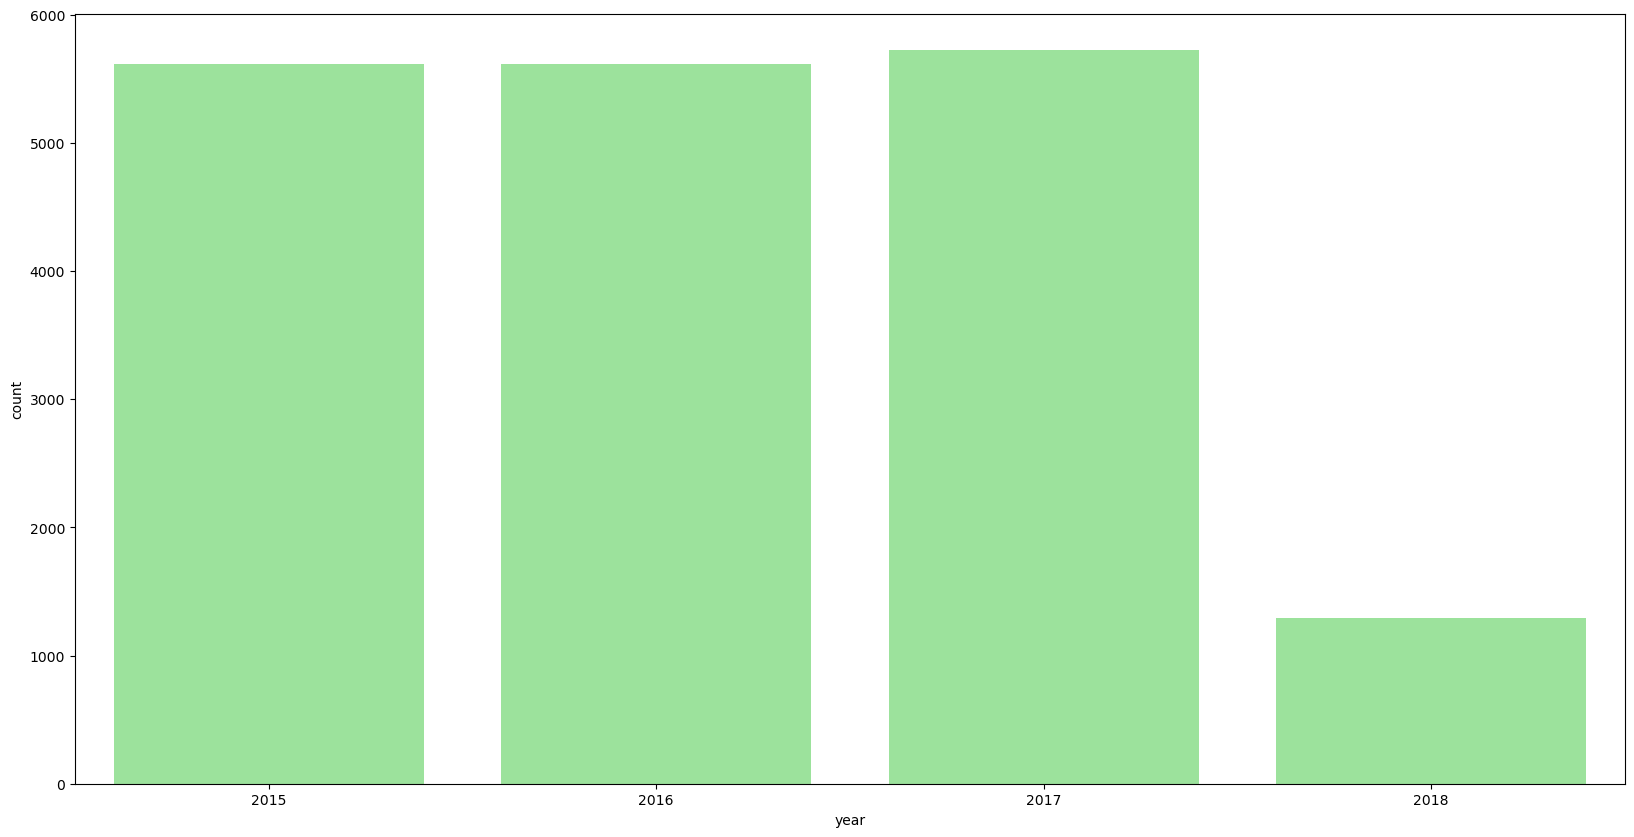

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(color='lightgreen',x='year',data=avo)

# 🧹 Pre-processing the Data


In [18]:
avo_prophet=avo[['Date','AveragePrice']]
avo_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [19]:
avo_prophet.columns=['ds','y']
model=Prophet()
model.fit(avo_prophet)

16:33:48 - cmdstanpy - INFO - Chain [1] start processing
16:33:59 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future=model.make_future_dataframe(periods=365) 
future.head()


,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01


In [22]:
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [23]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500304,0.845382,1.844775,1.500304,1.500304,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,0.0,0.0,0.0,1.382394
1,2015-01-11,1.494981,0.892176,1.859309,1.494981,1.494981,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,0.0,0.0,0.0,1.385583
2,2015-01-18,1.489658,0.844080,1.861202,1.489658,1.489658,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,0.0,0.0,0.0,1.380713
3,2015-01-25,1.484335,0.879629,1.869843,1.484335,1.484335,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,0.0,0.0,0.0,1.356655
4,2015-02-01,1.479011,0.811719,1.769572,1.479011,1.479011,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,0.0,0.0,0.0,1.323352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167023,0.532585,1.617708,0.951421,1.369548,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,-0.086344,0.0,0.0,0.0,1.080679
530,2019-03-22,1.166297,0.564673,1.598395,0.949837,1.369499,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,-0.084547,0.0,0.0,0.0,1.081751
531,2019-03-23,1.165571,0.569747,1.592064,0.948290,1.369211,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,-0.082471,0.0,0.0,0.0,1.083100
532,2019-03-24,1.164845,0.556142,1.585409,0.946742,1.369107,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,-0.080137,0.0,0.0,0.0,1.084708


In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.080679,0.532585,1.617708
530,2019-03-22,1.081751,0.564673,1.598395
531,2019-03-23,1.083100,0.569747,1.592064
532,2019-03-24,1.084708,0.556142,1.585409
533,2019-03-25,1.086547,0.555690,1.618072


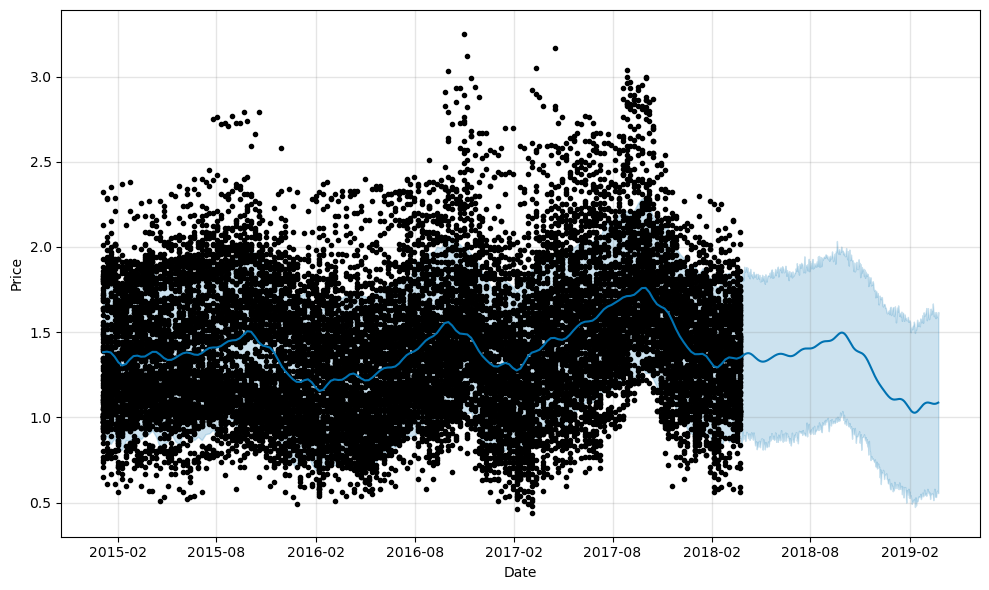

In [25]:
fig_forecast=model.plot(forecast,xlabel='Date',ylabel='Price')

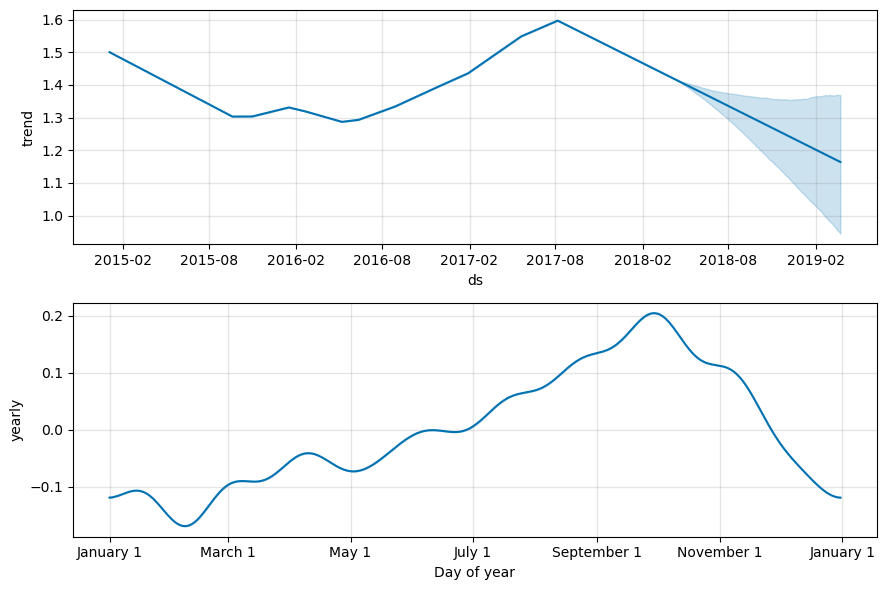

In [26]:
fig_com=model.plot_components(forecast)